 ## Pre-processing and Training Data Development

- Goal is to create a cleaned development dataset you can use to complete the modeling step of this project. 

In [1]:
# Import libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

#suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Shalin\\Springboard bootcamp\\projects\\Capstone project 2\\Capstone Two'

In [3]:
df = pd.read_csv("data/Quora_cleaned.csv")

In [4]:
df.head(5)

,Unnamed: 0,qid,question_stemmed,target,question_length,total_words
0,393959,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,118298,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26
2,1004888,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29
3,460851,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32
4,543322,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Unnamed: 0        1016694 non-null  int64 
 1   qid               1016694 non-null  object
 2   question_stemmed  1016694 non-null  object
 3   target            1016694 non-null  int64 
 4   question_length   1016694 non-null  int64 
 5   total_words       1016694 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 46.5+ MB


In [6]:
# Drop index columns
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(2)

,qid,question_stemmed,target,question_length,total_words
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26


In [7]:
# Print the data type of each column
print(df.dtypes)

qid                 object
question_stemmed    object
target               int64
question_length      int64
total_words          int64
dtype: object


### Standardize the magnitude of numeric features using a scaler

In [8]:
# Find the average length of word
df['avg_word_length'] = df['question_length'] / df['total_words']

# Print the first 5 rows of these columns
print(df[['question_stemmed', 'question_length', 'total_words', 'avg_word_length']].head(5))

                                    question_stemmed  question_length  \
0  prospects international students httpwwwophamm...              240   
1  could probing quantum world vacuum virtual par...              221   
2  mention good book containing quotations great ...              219   
3  didnt genghiz khan thee great khan abolish des...              218   
4  india harbor many scammers thieves con artists...              218   

   total_words  avg_word_length  
0           12        20.000000  
1           26         8.500000  
2           29         7.551724  
3           32         6.812500  
4           27         8.074074  


In [9]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int64','float'])
print(numeric_df.columns)

Index(['target', 'question_length', 'total_words', 'avg_word_length'], dtype='object')


In [10]:
# Create subset of only the categorical variable columns
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['qid', 'question_stemmed'], dtype='object')


In [11]:
numeric_df['avg_word_length'].describe()

count    1.016694e+06
mean     6.680972e+00
std      1.129022e+00
min      1.933333e+00
25%      6.000000e+00
50%      6.615385e+00
75%      7.375000e+00
max      5.300000e+01
Name: avg_word_length, dtype: float64

In [12]:
# Instantiate StandardScaler to generate the absolute values are mapped in the range [0, 1].
# This is optional step for our dataset since there are not many outliers, however, this condenses data even better

scaler = MaxAbsScaler()

# Fit SS_scaler to the data
scaler.fit(numeric_df[['avg_word_length']])

# Transform the data using the fitted scaler
numeric_df['avg_word_length_scaled'] = scaler.transform(numeric_df[['avg_word_length']])

# Compare the origional and transformed column
print(numeric_df[['avg_word_length_scaled', 'avg_word_length']].head(5))

   avg_word_length_scaled  avg_word_length
0                0.377358        20.000000
1                0.160377         8.500000
2                0.142485         7.551724
3                0.128538         6.812500
4                0.152341         8.074074


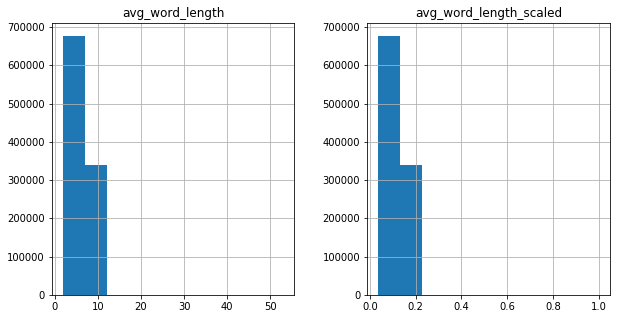

In [13]:
# Create a histogram for the 2 
plt.rcParams["figure.figsize"] = (10,5)

numeric_df.hist(['avg_word_length','avg_word_length_scaled'])
plt.show()

In [14]:
# Drop non scaled column
numeric_df.drop(columns='avg_word_length', inplace=True)
numeric_df.head(5)

,target,question_length,total_words,avg_word_length_scaled
0,0,240,12,0.377358
1,0,221,26,0.160377
2,0,219,29,0.142485
3,1,218,32,0.128538
4,1,218,27,0.152341


In [15]:
numeric_df['avg_word_length_scaled'].describe()

count    1.016694e+06
mean     1.260561e-01
std      2.130230e-02
min      3.647799e-02
25%      1.132075e-01
50%      1.248186e-01
75%      1.391509e-01
max      1.000000e+00
Name: avg_word_length_scaled, dtype: float64

In [16]:
df_numeric_scaled = pd.concat([categorical_df, numeric_df], axis=1, sort=False)
df_numeric_scaled.head(5)

,qid,question_stemmed,target,question_length,total_words,avg_word_length_scaled
0,4d2e2796dd1ced2c8e64,prospects international students httpwwwophamm...,0,240,12,0.377358
1,1729272298ed7f6cf789,could probing quantum world vacuum virtual par...,0,221,26,0.160377
2,c4ee0b28e195a3d515a5,mention good book containing quotations great ...,0,219,29,0.142485
3,5a3f6882c1fc8319eff1,didnt genghiz khan thee great khan abolish des...,1,218,32,0.128538
4,6a71d18ec595137eb634,india harbor many scammers thieves con artists...,1,218,27,0.152341


In [17]:
# Perform stemming again to ensure all words are properly stemmed. 
from nltk.stem import PorterStemmer
import stem

porter_stemmer = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df_numeric_scaled['question_final'] = df_numeric_scaled['question_stemmed'].apply(stem_sentences)
df_numeric_scaled = df_numeric_scaled.drop(columns=['question_stemmed']) # Get rid of the redundant column.
df_numeric_scaled.head(5)

,qid,target,question_length,total_words,avg_word_length_scaled,question_final
0,4d2e2796dd1ced2c8e64,0,240,12,0.377358,prospect intern student httpwwwophammainquorac...
1,1729272298ed7f6cf789,0,221,26,0.160377,could probe quantum world vacuum virtual parti...
2,c4ee0b28e195a3d515a5,0,219,29,0.142485,mention good book contain quotat great person ...
3,5a3f6882c1fc8319eff1,1,218,32,0.128538,didnt genghiz khan thee great khan abolish des...
4,6a71d18ec595137eb634,1,218,27,0.152341,india harbor mani scammer thiev con artist chi...


In [18]:
df_numeric_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016694 entries, 0 to 1016693
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   qid                     1016694 non-null  object 
 1   target                  1016694 non-null  int64  
 2   question_length         1016694 non-null  int64  
 3   total_words             1016694 non-null  int64  
 4   avg_word_length_scaled  1016694 non-null  float64
 5   question_final          1016694 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 46.5+ MB


### Perform Count vectorization on categorical feature to fit and transform data

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#'quantum' in ENGLISH_STOP_WORDS 
#'scammers' in ENGLISH_STOP_WORDS 
'ask stupid question' in ENGLISH_STOP_WORDS 

False

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
# In data Wrangling step, stop words were removed using nltk. However at this step, we will remove step_words using sklearn library too
cv_trigram_vec = CountVectorizer(stop_words='english',
                                 max_features=500, 
                                 #token_pattern='(?u)\b\w+\b',
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df_numeric_scaled['question_final'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

['10 year ago', '10 year experi', '10 year old', '11 year old', '12 year old', '12th board exam', '13 year old', '14 year old', '15 year old', '16 year old', '17 year old', '18 year old', '19 year old', '20 year old', '2018 world cup', '21 year old', '22 year old', '23 year old', '24 year old', '25 year old', '26 year old', '27 year old', '28 year old', '30 year old', '40 year old', '50 year old', 'academ pressur workload', 'act style lik', 'affect way read', 'air traffic control', 'alway feel like', 'american civil war', 'american footbal play', 'android app develop', 'answer question quora', 'app develop compani', 'appl cider vinegar', 'ask question quora', 'ask stupid question', 'attack north korea', 'australia new zealand', 'aveng infin war', 'backstori movi got', 'barack hussein obama', 'becom commerci pilot', 'becom data scientist', 'becom ia offic', 'becom prime minist', 'becom softwar engin', 'best android app', 'best book learn', 'best book prepar', 'best book read', 'best boo

In [ ]:
# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head(5))

Counts_tip someon start         581
Counts_someon start work        577
Counts_use tip someon           575
Counts_shortterm busi travel    413
Counts_good hotel shortterm     413
dtype: int64


In [ ]:
df_final = pd.concat([df_numeric_scaled, cv_tri_df], axis=1, sort=False)
df_final.head(5)

,qid,target,question_length,total_words,avg_word_length_scaled,question_final,Counts_10 year ago,Counts_10 year experi,Counts_10 year old,Counts_11 year old,...,Counts_year old kid,Counts_year old male,Counts_year old man,Counts_year old son,Counts_year old start,Counts_year old want,Counts_year old woman,Counts_year question paper,Counts_year work experi,Counts_youtub channel learn
0,4d2e2796dd1ced2c8e64,0,240,12,0.377358,prospect intern student httpwwwophammainquorac...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1729272298ed7f6cf789,0,221,26,0.160377,could probe quantum world vacuum virtual parti...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c4ee0b28e195a3d515a5,0,219,29,0.142485,mention good book contain quotat great person ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5a3f6882c1fc8319eff1,1,218,32,0.128538,didnt genghiz khan thee great khan abolish des...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6a71d18ec595137eb634,1,218,27,0.152341,india harbor mani scammer thiev con artist chi...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into testing and training datasets 

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_final, test_size=0.2)

In [ ]:
train_df.shape

(813355, 506)

In [ ]:
test_df.shape

(203339, 506)

In [ ]:
test_df.head(5)

,qid,target,question_length,total_words,avg_word_length_scaled,question_final,Counts_10 year ago,Counts_10 year experi,Counts_10 year old,Counts_11 year old,...,Counts_year old kid,Counts_year old male,Counts_year old man,Counts_year old son,Counts_year old start,Counts_year old want,Counts_year old woman,Counts_year question paper,Counts_year work experi,Counts_youtub channel learn
584759,3f2dbbc68b33555caf0c,0,34,6,0.106918,much would cost build hotel africa,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144717,c9f7a145bd340d0ae1c9,0,69,11,0.118353,eras entir hard drive dell inspiron recent mod...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65014,95123f8ecb5877b05b29,0,89,11,0.152659,tent end semest exam schedul uptu kurukshetra ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992520,5de71fc3907f7c77a55b,0,13,3,0.081761,kid learn fun,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70229,53a6998dec1e1d5b0fb0,0,87,12,0.136792,outstand balanc umass us resid credit histori ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.to_csv("data/FeatureEngineering_Test.csv")

In [ ]:
train_df.to_csv("data/FeatureEngineering_Train.csv")